In [58]:
#importandoa as biblioetcas usadas para a preparação dos dados e predição
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#importando as biblioteca da api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
#buscando todos os jogos
result = leaguegamefinder.LeagueGameFinder()
todosJogos = result.get_data_frames()[0]

In [60]:
#tranformando os dados da api em um dataframe
df = pd.DataFrame(todosJogos)

In [61]:
#retirando os dados que nao sera usado na api
df.drop(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID','GAME_DATE', 'MATCHUP'], axis=1, inplace=True)
df.head()

,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,L,241,106,41,85,0.482,6,29,0.207,18,...,0.750,10,37,47,21,11,8,16,21,-6.0
1,L,242,95,33,91,0.363,16,49,0.327,8,...,0.615,18,41,59,22,6,11,19,22,-4.0
2,L,241,116,41,99,0.414,12,48,0.250,22,...,0.815,9,31,40,21,13,4,12,21,-7.0
3,W,241,104,33,74,0.446,11,34,0.324,27,...,0.931,3,41,44,21,7,4,14,16,2.0
4,L,242,91,34,91,0.374,12,37,0.324,11,...,0.647,10,30,40,21,8,3,16,16,-32.0


In [62]:
df['WL'] = pd.get_dummies(df['WL'])

In [63]:
#Transformando os dados categóricos de  WINorLOSS para numeros
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['WL'])
df['WL'] = le.transform(df['WL'])

In [64]:
df.columns

Index(['WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [65]:
# Definindo as caracteristicas que serão utilizadas para prever
x = df[['PTS','MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS']]
x = x.fillna(x.mean())

In [66]:
# pasando para o vetor x os dados de parametros o que vai se predito
y = df['WL']
y = y.fillna(y.mean())

In [67]:
#importando para separar dos dados de teste e de treino
from sklearn.model_selection import train_test_split

In [68]:
#separando os dados de treino de teste sendo 40% para teste e 60% para treino e escolhedo o um random 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.4,random_state=101)
aux = y_teste.reset_index()
aux.drop('index',axis=1,inplace=True)

In [69]:
#prenchendo os dados faltantes com a media dos valores
x_treino = x_treino.fillna(x_treino.mean())
x_teste = x_teste.fillna(x_teste.mean())
y_treino = y_treino.fillna(y_treino.mean())
y_teste = y_teste.fillna(y_teste.mean())

In [70]:
#importando o algoritmo de vou uzar para a prediçao e inicializando
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

In [71]:
#encontrando e fazendo os modelos de treino e fazendo a normalização dos dados
ln.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
coefs = pd.DataFrame(ln.coef_,x.columns,columns=['coefs'])

In [73]:
#fazendo a prediçao
predicao = ln.predict(x_teste)

Text(0, 0.5, 'Y valor predito')

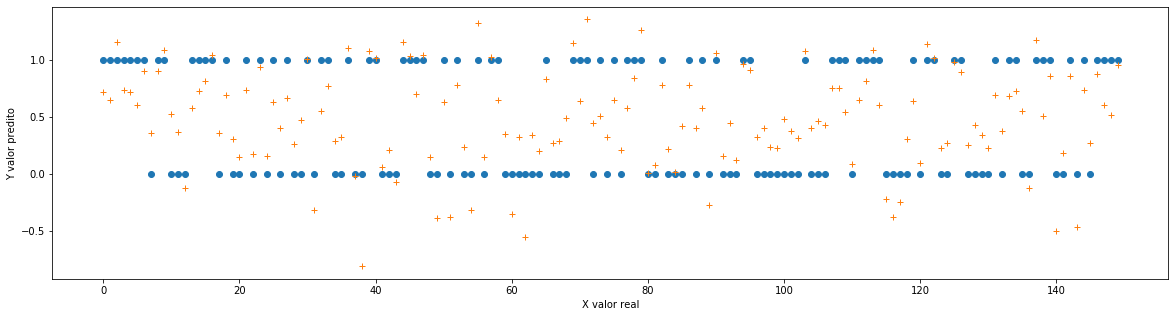

In [74]:
#plotando o grafico de prediçao
#sendo o eixo x o valor real dos resultado dos jogos
#sendo o eixo y o valor de previsto para os resultado dos jogos
plt.figure(figsize=(20,5))
plt.plot(aux[:150], 'o')
plt.plot(predicao[:150], '+')
plt.xlabel('X valor real')
plt.ylabel('Y valor predito')

In [75]:
from sklearn import metrics

In [76]:
#MAE é o mais fácil de entender, porque é o erro médio.
#MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
#RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 0.2561830372888034
MSE: 0.08788431246657052
RMSE: 0.29645288405844616


In [77]:
print('Variance score: %.2f' % ln.score(x_teste, y_teste))

Variance score: 0.65


In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ln, x,y, cv=10)

In [79]:
print('Variance score: %.2f' % max(scores))

Variance score: 0.68
